### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Exploratory Data Analysis
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [29]:
#Import libraries to use.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb

%matplotlib inline

In [30]:
data=pd.read_csv(r'C:\Users\luise\OneDrive\Documentos\PYTHON PRACTICE\Codecademy\Marketing Data\marketing_data.csv')
data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [32]:
data.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in lowercase.
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

In [34]:

data.columns=data.columns.str.lower()
data.columns


Index(['id', 'yearbirth', 'education', 'maritalstatus', 'income', 'kidhome',
       'teenhome', 'dtcustomer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldproducts', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [35]:
# Clean Columns

#taking dollar sign out of values and convert to float
data['income']=data['income'].replace( '[\$,]', '',regex=True).astype(float)
data['income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: income, Length: 2240, dtype: float64

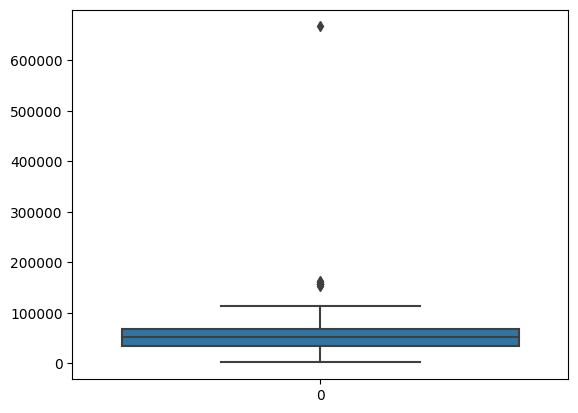

In [36]:
plt.figure()
sns.boxplot(data['income'])
plt.show()

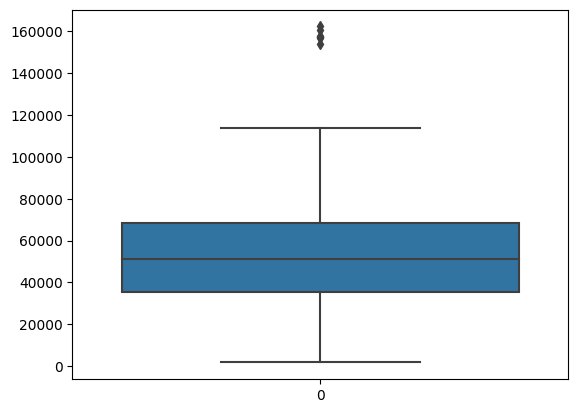

In [37]:
data=data[data['income']<300000]
plt.figure()
sns.boxplot(data['income'])
plt.show()


Removing the outliear since there is inly one.
After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

In [38]:
# replace missing values with the mean income
data['income'] = data['income'].fillna(data['income'].mean())

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2020 (the year the dataset is from). 
* Any outliers in `age` that could affect the analysis are removed. 

In [39]:
data['age']=2020-data['yearbirth']
data['age']

0       50
1       59
2       62
3       53
4       31
        ..
2235    44
2236    43
2237    44
2238    42
2239    51
Name: age, Length: 2215, dtype: int64

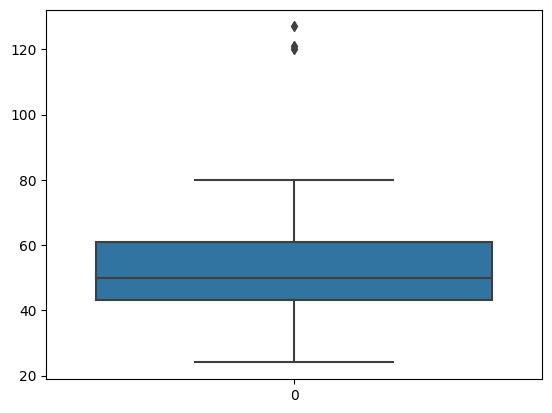

In [40]:
plt.figure()
sns.boxplot(data["age"])
plt.show()

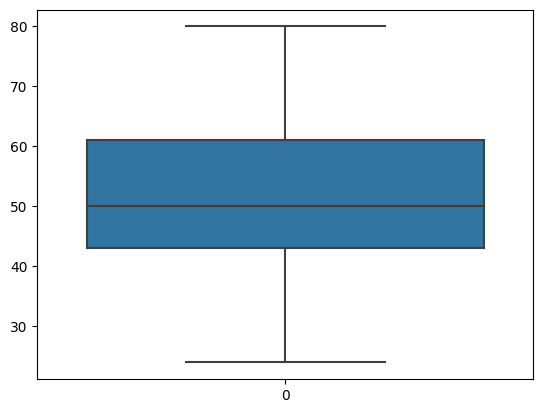

In [49]:
data=data[data['age']<100]
plt.figure()
sns.boxplot(data["age"])
plt.show()

#### Checking the Education Variable 

The education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before EDA. There is no missing data or other issues, so it can be left as is.

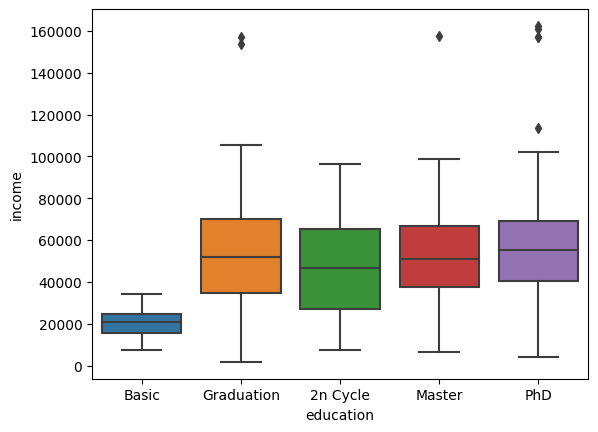

In [51]:
plt.figure()
sns.boxplot(x=data["education"],y=data['income'],order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

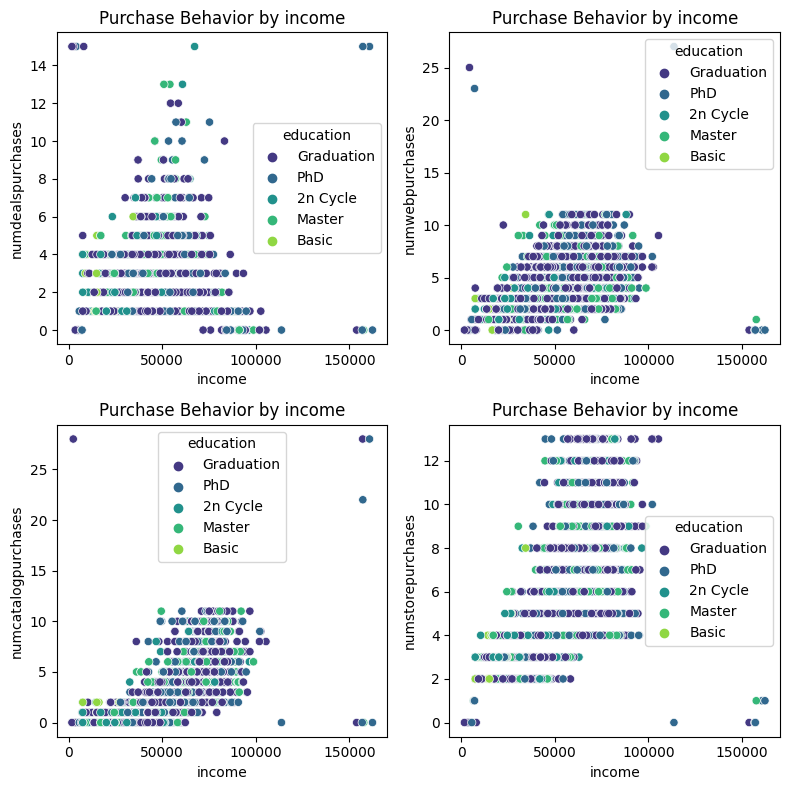

In [52]:
# num purchases columns list
num_purchases_cols = ["numdealspurchases", "numwebpurchases", "numcatalogpurchases", "numstorepurchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=data["income"], y= data[num_purchases_cols[i]], 
                    hue=data["education"], palette="viridis")
    plt.title("Purchase Behavior by income")
    
plt.tight_layout()
plt.show()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable.

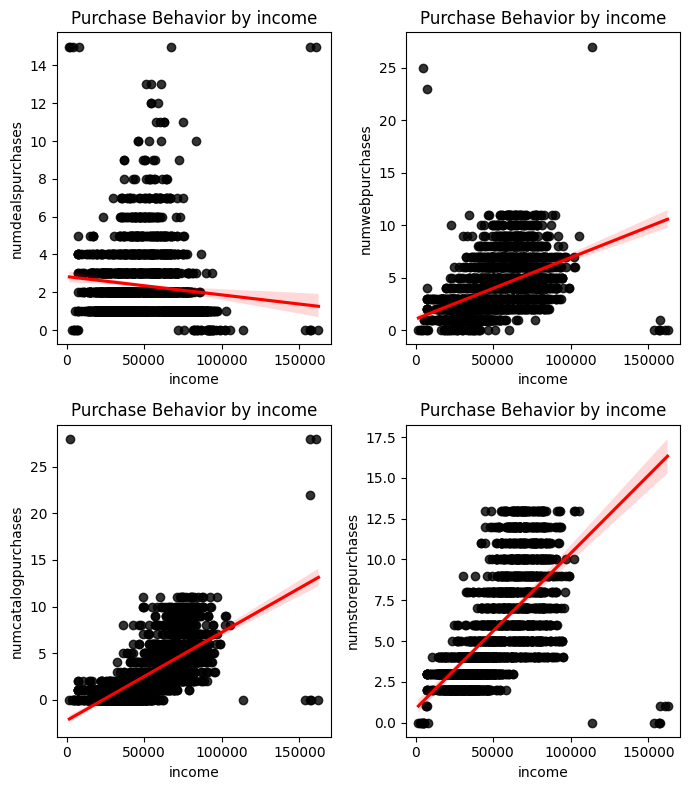

In [53]:
# num purchases columns list
num_purchases_cols = ["numdealspurchases", "numwebpurchases", "numcatalogpurchases", "numstorepurchases"]
fig = plt.figure(figsize=(7,8))
plot = 0
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # set up subplots
    ax = plt.subplot(2, 2, plot)
    # regression plot of purchases vs. income
    sns.regplot(x=data["income"], y= data[num_purchases_cols[i]], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

In [54]:
# add new total_purchases column to marketing_data
data["total_purchases"] = data["numdealspurchases"]+data["numcatalogpurchases"] + data["numwebpurchases"] + data["numstorepurchases"]

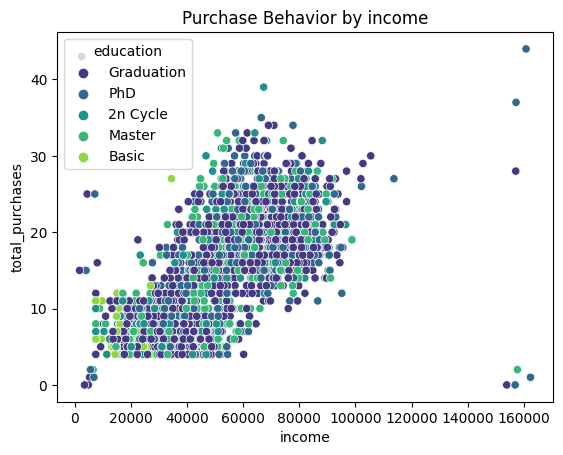

In [60]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=data["total_purchases"], x=data["income"], 
                hue=data['education'], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()

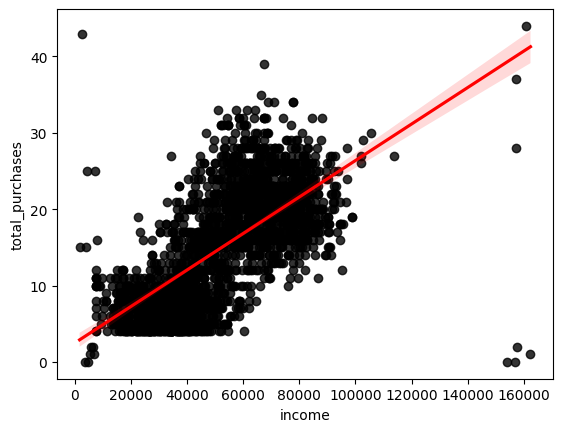

In [61]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=data["total_purchases"], x=data["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the `education` and `total_purchases` as the points are scattered randomly across the plot.

#### More Purchasing Behavior by Income
The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

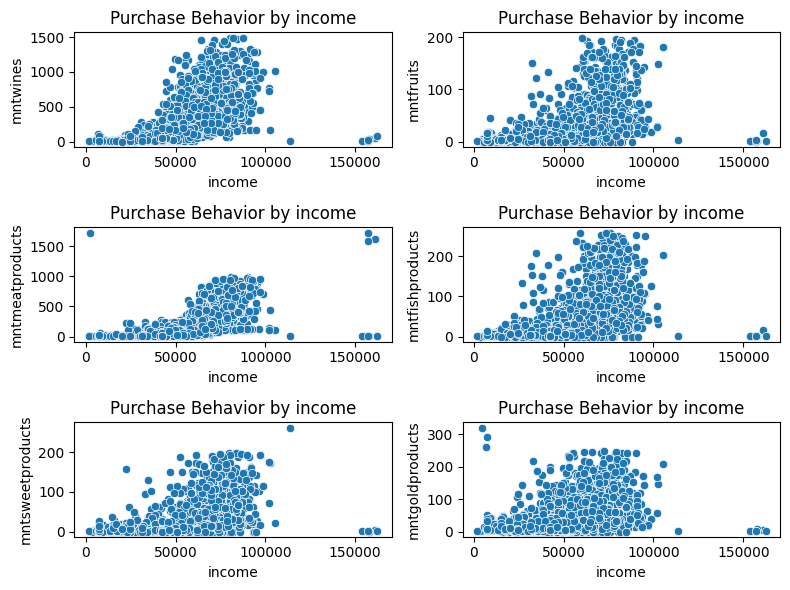

In [63]:
# amounts of items list
amounts_list = ["mntwines", "mntfruits", "mntmeatproducts", "mntfishproducts", "mntsweetproducts", "mntgoldproducts"]
plot = 0
fig = plt.figure(figsize=(8,6))
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # set up subplots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. income
    sns.scatterplot(y= data[amounts_list[i]], x=data["income"])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

#### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

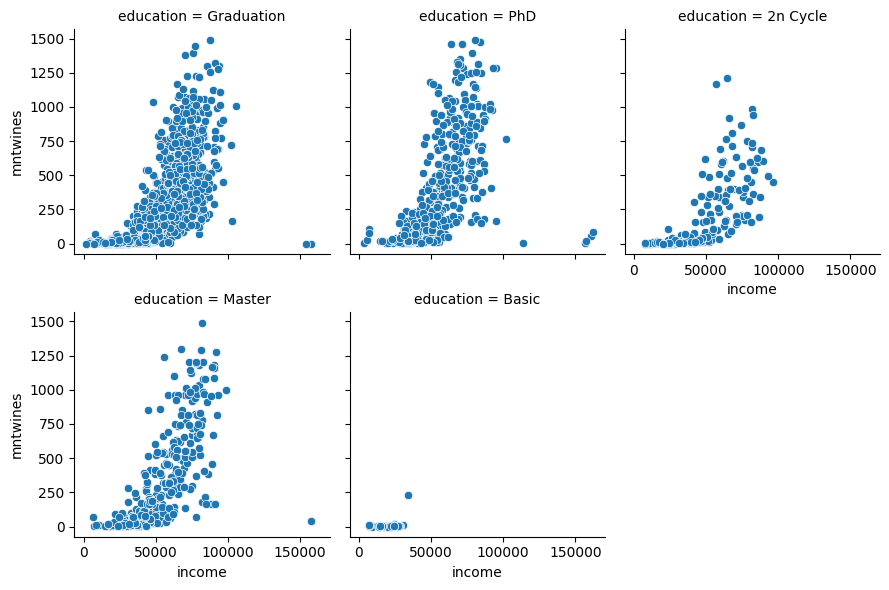

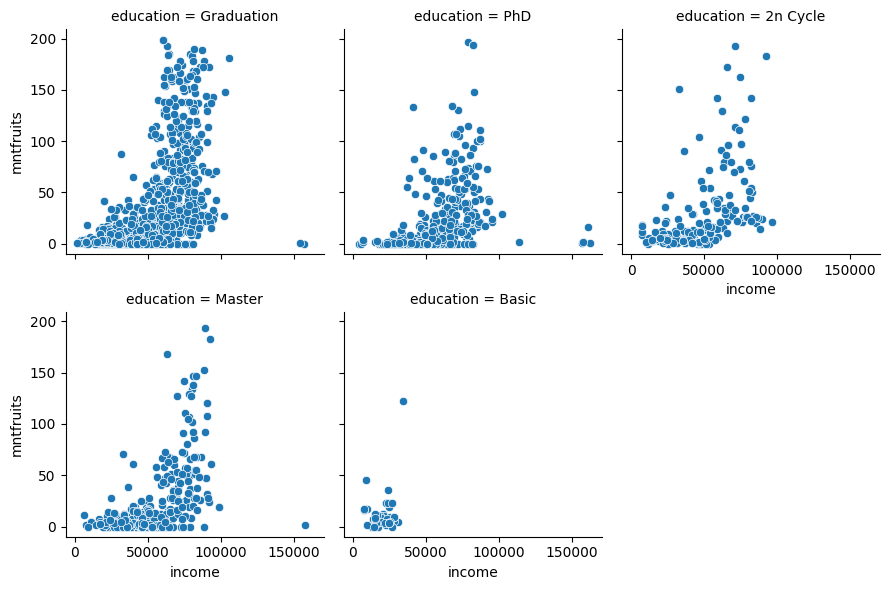

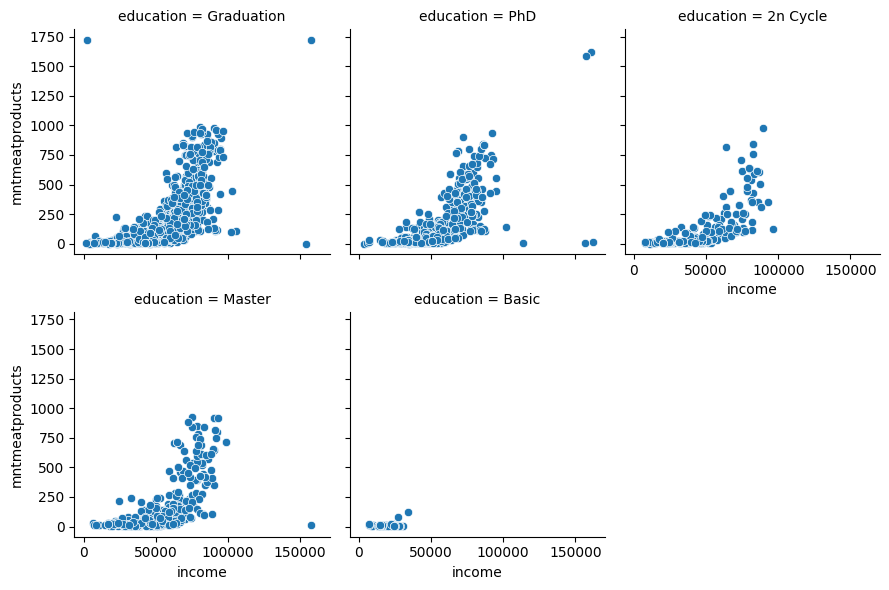

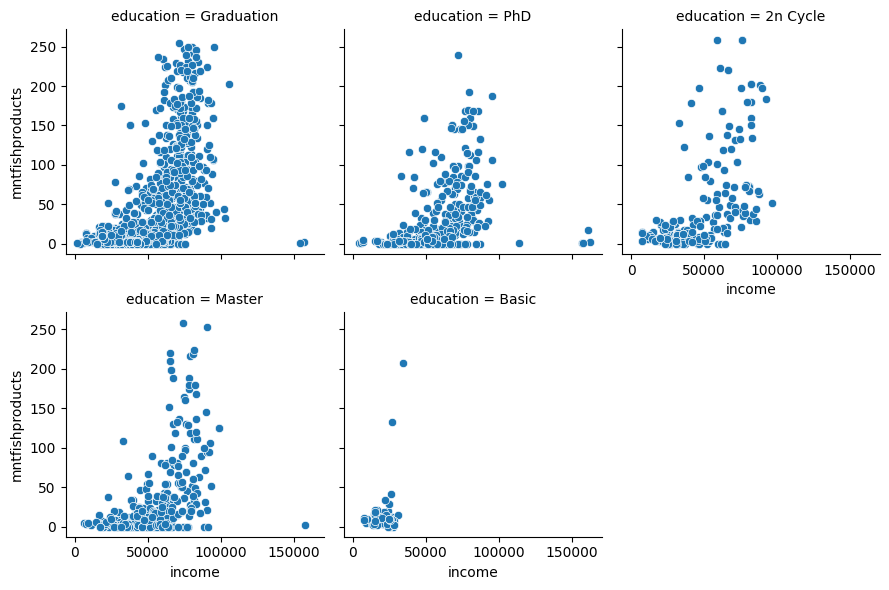

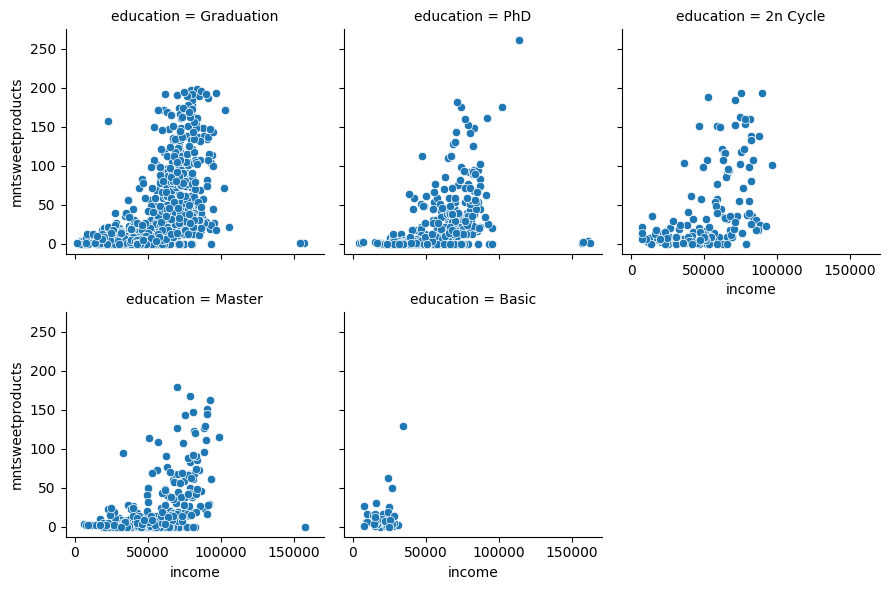

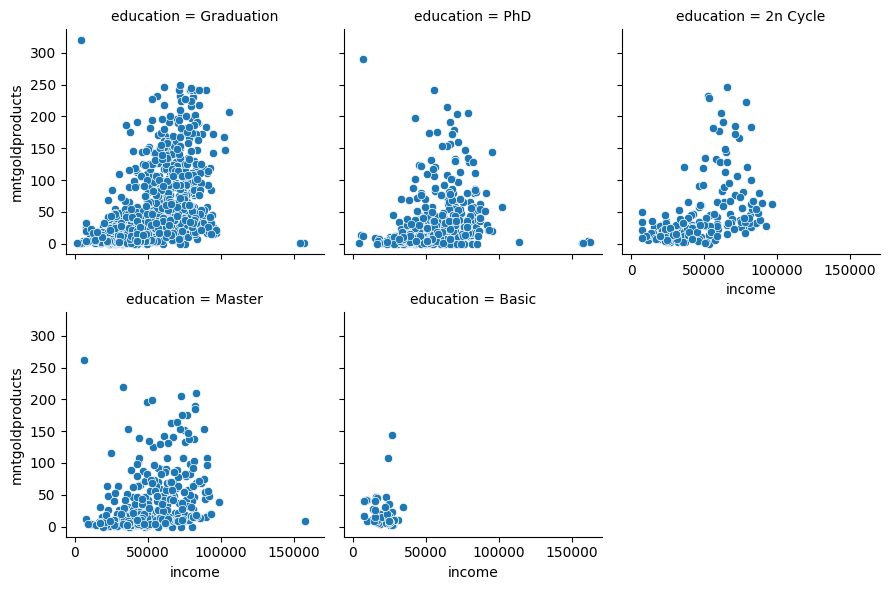

In [64]:
# dictionary used to contain dynamic variables
variable_names = {}
#amounts columns list
amounts_list = ["mntwines", "mntfruits", "mntmeatproducts", "mntfishproducts", "mntsweetproducts", "mntgoldproducts"]

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", amounts_list[i])
plt.show()

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
* `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

#### Purchasing Behavior by Age <a class="anchor" id="section3_5"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

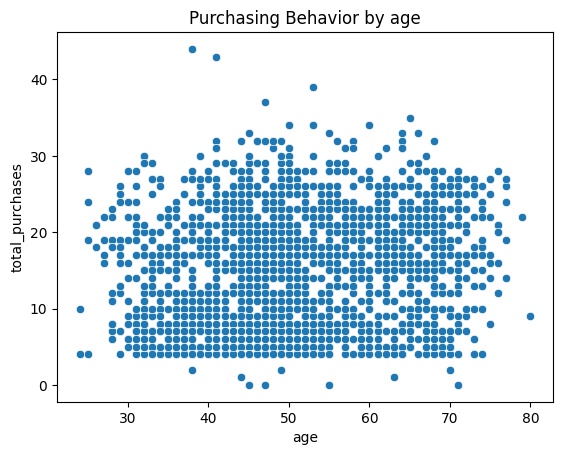

In [65]:
plt.figure()
# scatterplot of total purchases vs. age
sns.scatterplot(x=data["age"], y=data["total_purchases"])
plt.title("Purchasing Behavior by age")
plt.show()

It is hard to see any relationship between `age` and `total_purchases` in this plot.

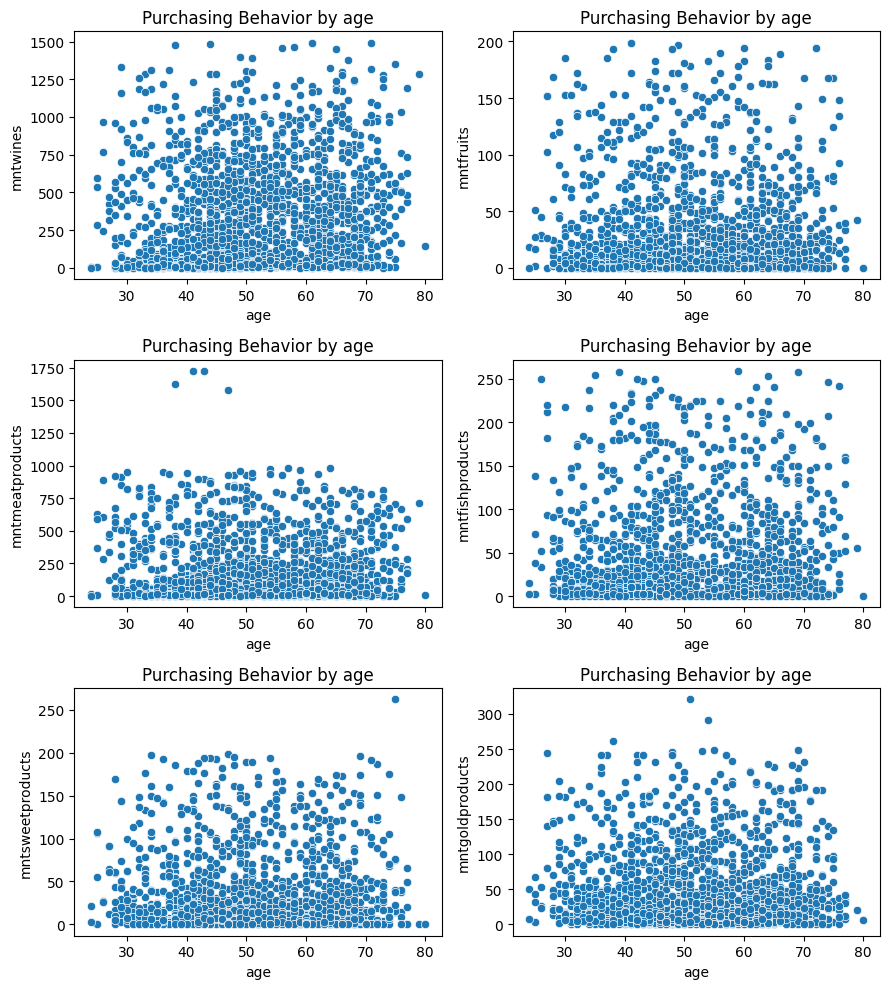

In [66]:
plot = 0
fig = plt.figure(figsize=(9,10))
# looping through the length of the amounts columns list
for i in range(len(amounts_list)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(3, 2, plot)
    # plotting amounts purchased vs. income
    sns.scatterplot(y= data[amounts_list[i]], x=data["age"])
    plt.title("Purchasing Behavior by age")
plt.tight_layout()
plt.show()

Again, it is difficult to decipher any pattern between `age` and any `mnt_{type}_products` in any of these plots. A different strategy may be useful to analyze `age`.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

In [68]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
data['age_group'] = data['age'].apply(age_groups)

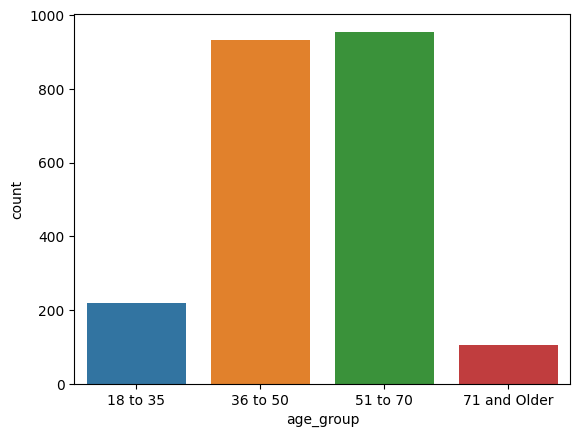

In [71]:
# plotting the age Group variable in a bar chart
plt.figure()
sns.countplot(x=data['age_group'], order=['18 to 35', '36 to 50', '51 to 70', '71 and Older'])
plt.show()

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping at the store.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [73]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = data.loc[:, ('age', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 
'mntsweetproducts', 'mntgoldproducts')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

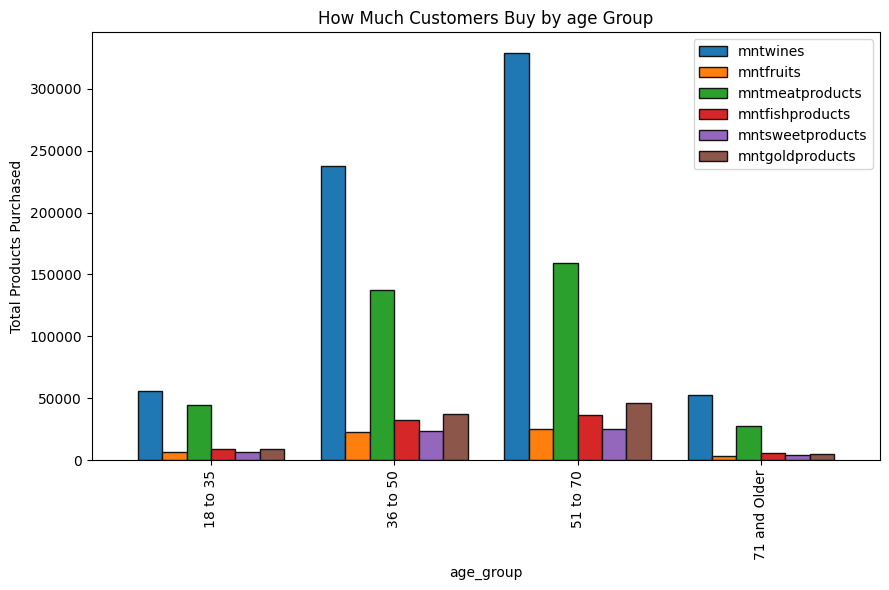

In [75]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mntwines', 
'mntfruits', 
'mntmeatproducts', 
'mntfishproducts', 
'mntsweetproducts', 
'mntgoldproducts'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

### Conclusion 

#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 